In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = pd.read_csv("./Resources/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("./Resources/clinicaltrial_data.csv")
#mouse_drug_data_to_load.head()

# Read the Mouse and Drug Data and the Clinical Trial Data
#clinical_trial_data_to_load.head()

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data_to_load, mouse_drug_data_to_load, how = "outer", on="Mouse ID")

# Display the data table for preview.head()
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_data.groupby(["Drug", "Timepoint"]).mean()
mean_tumor_volume = mean_tumor_volume.loc[:,['Tumor Volume (mm3)']]

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
mean_tumor_volume_df.reset_index(inplace=True)

In [4]:
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

mean_tumor_volume_se = combined_data.groupby(["Drug", "Timepoint"]).sem()
mean_tumor_volume_se = mean_tumor_volume_se.loc[:,['Tumor Volume (mm3)']]
sema = mean_tumor_volume_se["Tumor Volume (mm3)"]
# Convert to DataFrame
mean_tumor_volume_se = pd.DataFrame(mean_tumor_volume_se) 
# Preview DataFrame
mean_tumor_volume_se


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [6]:
mean_tumor_volume_se.reset_index(inplace=True)

In [7]:
mean_tumor_volume_se

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [8]:
# Minor Data Munging to Re-Format the Data Frames
#reformat = mean_tumor_volume_se.set_index('Timepoint')
mean_tumor_volume = mean_tumor_volume.reset_index()
mean_tumor_volume_pivot = mean_tumor_volume.pivot(index = 'Timepoint', columns = 'Drug')["Tumor Volume (mm3)"]

mean_tumor_volume_se = mean_tumor_volume_se.reset_index()
mean_tumor_volume_se_pivot = mean_tumor_volume_se.pivot(index = 'Timepoint', columns = 'Drug')["Tumor Volume (mm3)"]
# Preview that Reformatting worked
mean_tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [9]:
mean_tumor_volume_se_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


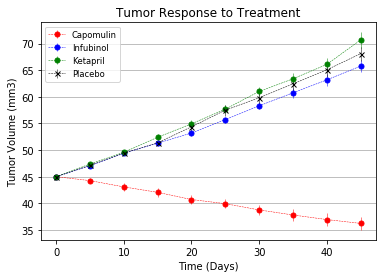

In [12]:
# Generate the Plot (with Error Bars)

plt.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot['Capomulin'], yerr=mean_tumor_volume_se_pivot['Capomulin'],
            color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot["Infubinol"], yerr=mean_tumor_volume_se_pivot["Infubinol"],
            color = "b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot["Ketapril"], yerr=mean_tumor_volume_se_pivot["Ketapril"],
            color = "g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot["Placebo"], yerr=mean_tumor_volume_se_pivot["Placebo"],
            color = "k", marker="x", markersize=5, linestyle="dashed", linewidth=0.50)     
# Save the Figure
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [29]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = combined_data.groupby(["Drug", "Timepoint"]).mean()
mean_met_site = mean_met_site.loc[:,['Metastatic Sites']]
# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site)
# Preview DataFrame
mean_met_site_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [30]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_met_site_se = combined_data.groupby(["Drug", "Timepoint"]).sem()
mean_met_site_se = mean_met_site_se.loc[:,['Metastatic Sites']]
# Convert to DataFrame
mean_met_site_se_df = pd.DataFrame(mean_met_site_se)
# Preview DataFrame
mean_met_site_se_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [32]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site = mean_met_site.reset_index()
mean_met_site_pivot = mean_met_site.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

mean_met_site_se = mean_met_site_se.reset_index()
mean_met_site_se_pivot = mean_met_site_se.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
mean_met_site_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


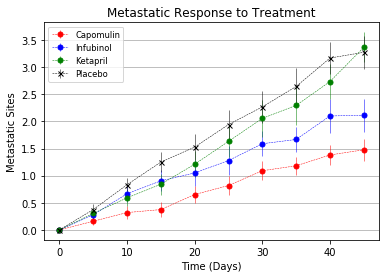

In [43]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot['Capomulin'], yerr=mean_met_site_se_pivot['Capomulin'],
            color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot['Infubinol'], yerr=mean_met_site_se_pivot['Infubinol'],
            color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot['Ketapril'], yerr=mean_met_site_se_pivot['Ketapril'],
            color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_met_site_pivot.index, mean_met_site_pivot['Placebo'], yerr=mean_met_site_se_pivot['Placebo'],
            color="k", marker="x", markersize=5, linestyle="dashed", linewidth=0.50)
# Save the Figure

# Show the Figure
plt.title("Metastatic Response to Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [52]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = combined_data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
mouse_count = mouse_count.reset_index()
mouse_count.rename(columns = {'Mouse ID':'Mouse Count'}, inplace = True)
# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
# Preview DataFrame
mouse_count_df

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [54]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


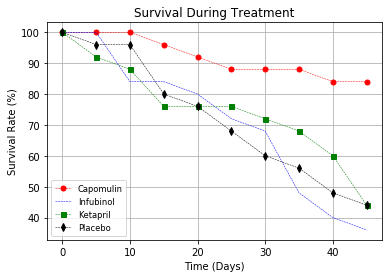

In [60]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mouse_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_pivot["Infubinol"] / 25, "b", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_pivot["Placebo"] / 25, "kd", linestyle="dashed", markersize=5, linewidth=0.50)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")         
plt.xlabel("Time (Days)")
plt.grid(True)         

plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small",fancybox="true")
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [62]:
# Calculate the percent changes for each drug
tumor_pct_change = 100 * (mean_tumor_volume_pivot.iloc[-1] - mean_tumor_volume_pivot.iloc[0]) / mean_tumor_volume_pivot.iloc[0]
tumor_pct_change_sem = 100 * (mean_tumor_volume_se_pivot.iloc[-1] - mean_tumor_volume_se_pivot.iloc[0]) / mean_tumor_volume_se_pivot.iloc[0]
         

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

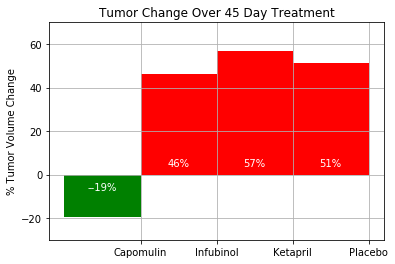

In [71]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
             tumor_pct_change["Infubinol"],
             tumor_pct_change["Ketapril"],
             tumor_pct_change["Placebo"])
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color="green")
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color="red")


#Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim((-30, 70))
ax.grid(True)
# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2. , 3, "%d%%" % int(height),
               ha = 'center', va='bottom', color='white')
        

# Call functions to implement the function calls
def autolabelPass(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2. , -8, '-%d%%' % int(height),
                   ha='center', va='bottom', color='white')

# Save the Figure
autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)